# Surprise Housing Assignment

#### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Reading and Understanding the Data

In [936]:
#Importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [937]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [938]:
# import the DataFrame into 'df' object
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [939]:
df.shape

(1460, 81)

Total 81 variables are there, which contains 80 independent and 1 dependent variables.

In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dataset contains three types of data viz. object, float64 and int64.

### Data Cleaning

#### Null value imputation/treatment:

Let’s check out the number of NA values in each columns of the dataset.

In [941]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [942]:
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

There are total 19 columns in which NA values are present. Let’s check for each column with NA values one by one and decide how to handle them.

In [943]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [944]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [945]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [946]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Fence,Alley,MiscFeature and PoolQC are do not add any value to the data as most of the data is null so dropping the above columns

In [947]:
df=df.drop(['Fence','Alley','MiscFeature','PoolQC'],axis=1)

In [948]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

770 rows in FireplaceQu having some data, So drop it impute the other null data with "Not_Available"

In [949]:
df['FireplaceQu'].replace(np.nan,'Not_Available',inplace=True)
#data sanity check
df.FireplaceQu.value_counts()

Not_Available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [950]:
df.LotFrontage.dtype

dtype('float64')

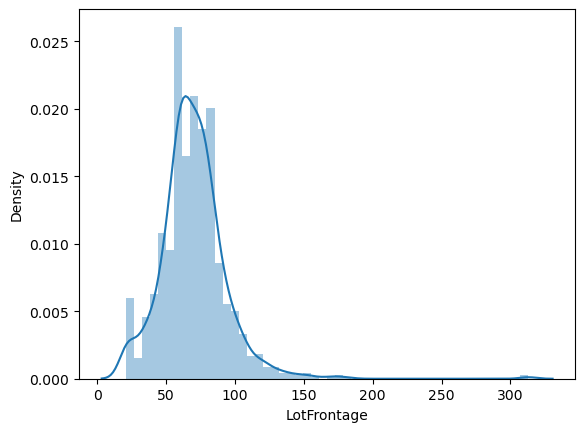

In [951]:
sns.distplot(df.LotFrontage)
plt.show()

From the above plot, we may notice that there are quote a low outliers and hence the distribution of the data is right-skewed.

In [952]:
df.LotFrontage.isnull().sum()/df.shape[0]*100

17.73972602739726

Notice that 17% of the data is missing. Let’s replace NA values with median value of this column.

In [953]:
df.LotFrontage.replace(np.nan,df.LotFrontage.median(),inplace=True)
#sanity check
df.LotFrontage.isnull().sum()

0

#### GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageCars & GarageQual

There are total 6 Garage related columns which gives below information:

- GarageYrBlt: Year garage was built
- GarageCond: Garage condition
- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageQual: Garage quality

Here let’s check the NA value counts in each of the columns.

In [954]:
garageCols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']
for i in garageCols:
    print(i)
    print(df[i].isnull().sum())
    print()

#0 value in GarageCars    
df[df.GarageCars==0].shape[0]

GarageYrBlt
81

GarageCond
81

GarageType
81

GarageFinish
81

GarageCars
0

GarageQual
81



81

Here we notice that all the columns have 81 NA values except GarageCars. 
GarageCars column has 81 0s.Let’s impute all the NA values in Garage related columns (except GarageCars and GarageYrBlt) with No_Garage.

In [955]:
df.GarageCond.replace(np.nan,'No_Garage',inplace=True)
df.GarageType.replace(np.nan,'No_Garage',inplace=True)
df.GarageFinish.replace(np.nan,'No_Garage',inplace=True)
df.GarageQual.replace(np.nan,'No_Garage',inplace=True)

Further, let’s keep GarageCars column as it is, since it does not have any NA values.

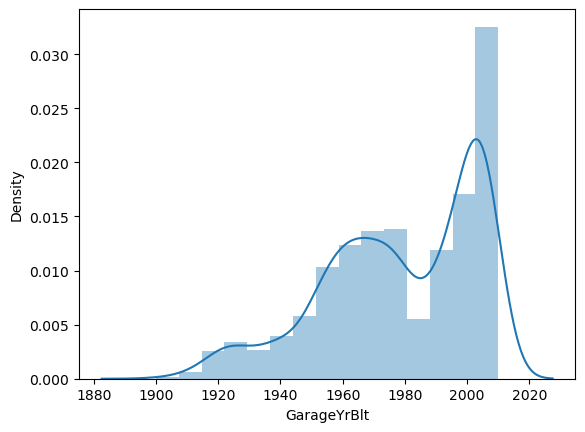

In [956]:
#check the data distribution of 'GarageYrBlt' column
sns.distplot(df.GarageYrBlt)
plt.show()

Data distribution of GarageYrBlt column is not normal.Garage built year also seem dependent of year of property built year and remodeling year. 
Imputation with some value might create garbage data. Hence the safest option would be to get derived variable out of this column.

Let’s get following driven metric out of GarageYrBlt column:

- 0: NA
- 1: GarageYrBlt<2000 (Old Garage)
- 2: GarageYrBlt>=2000 (New Garage)



In [957]:
#function to get the derived metric
def func(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0

In [958]:
df['GarageYrBlt']=df.GarageYrBlt.apply(func)

In [959]:
#sanity check
df.GarageYrBlt.value_counts()

1    977
2    402
0     81
Name: GarageYrBlt, dtype: int64

In [960]:
#final sanity check for Garage relatd variables
garage_cols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']
for i in garage_cols:
    print(i)
    print(df[i].isnull().sum())
    print()

GarageYrBlt
0

GarageCond
0

GarageType
0

GarageFinish
0

GarageCars
0

GarageQual
0



In [961]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Impute ‘NA’ with ‘No_Basement’.

In [962]:
df.BsmtFinType2.replace(np.nan,'No_Basement',inplace=True)
#sanity check
df.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [963]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Impute ‘NA’ with ‘No_Basement’

In [964]:
df.BsmtExposure.replace(np.nan,'No_Basement',inplace=True)
#sanity check
df.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64

In [965]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Impute ‘NA’ with ‘No_Basement’

In [966]:
df.BsmtFinType1.replace(np.nan,'No_Basement',inplace=True)
#sanity check
df.BsmtFinType1.value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [967]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

We need to impute ‘NA’ with ‘No_Basement’

In [968]:
df.BsmtCond.replace(np.nan,'No_Basement',inplace=True)
#value counts
df.BsmtCond.value_counts()

TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [969]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [970]:
df.BsmtQual.replace(np.nan,'No_Basement',inplace=True)
#sanity check
df.BsmtQual.value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

From the above basement related columns, Notice that columns BsmtFinType2 and BsmtExposure conveys 38 properties does not have basement while columns BsmtFinType1, BsmtCond, BsmtQual states that 37 properties does not have basement. So certainly one or two housing property has anomalous data. Let’s figure it out.

In [971]:
df[(df.BsmtFinType2=='No_Basement') & (df.BsmtExposure=='No_Basement')].shape

(37, 77)

In [972]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [973]:
df[(df.BsmtExposure=='No_Basement')].shape

(38, 77)

In [974]:
df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')].shape

(37, 77)

Corrupt rows in BsmtFinType2 & BsmtExposure. So let’s drop those two rows.

In [975]:
dd1=df[(df.BsmtFinType2=='No_Basement')]

In [976]:
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]

In [977]:
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333.0,20.0,RL,85.0,10655.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,WD,Normal,284000.0


In [978]:
dd1=df[(df.BsmtExposure=='No_Basement')]

In [979]:
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]

In [980]:
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949.0,60.0,RL,65.0,14006.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Normal,192500.0


From above we notice that rows with Id as 333.0 & 949.0 has erroneous basement related data. So we can drop these rows.

In [981]:
df=df[(df.Id!=333.0) & (df.Id!=949.0)]

In [982]:
df.MasVnrArea.dtype

dtype('float64')

In [983]:
df.MasVnrArea.isnull().sum()/df.shape[0]*100

0.5486968449931412

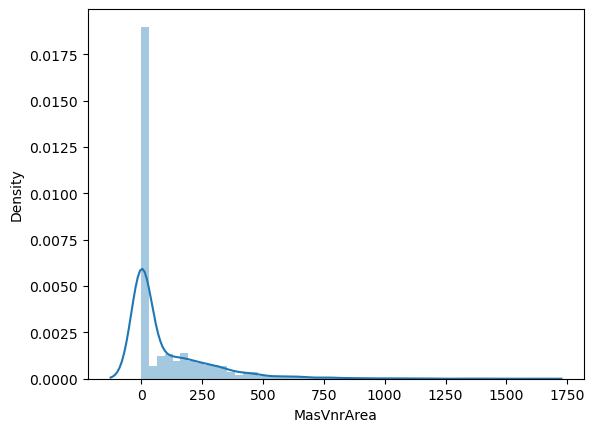

In [984]:
#check distribution plot
sns.distplot(df.MasVnrArea)
plt.show()

Replace ‘na’ by median value, as distribution seems skewed.

In [985]:
df.MasVnrArea.replace(np.nan,df.MasVnrArea.median(),inplace=True)

In [986]:
#sanity check
df.MasVnrArea.isnull().sum()/df.shape[0]*100

0.0

In [987]:
df.MasVnrType.value_counts()

None       864
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [988]:
#NA value percentage in this column
df.MasVnrType.isnull().sum()/df.shape[0]*100

0.5486968449931412

In [989]:
df.MasVnrType.replace(np.nan,'None',inplace=True)

In [990]:
#sanity check
df.MasVnrType.value_counts()

None       872
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [991]:
df.Electrical.value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [992]:
#NA value percentage in this column
df.Electrical.isnull().sum()

1

In [993]:
df.Electrical.replace(np.nan,df.Electrical.mode()[0],inplace=True)
df.Electrical.value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Check for those columns which are wrongly identified as numeric type but instead should be unordered categorical type

Note that we would not change ordered categorical variables that are of numeric type.

In [994]:
#all the numeric columns in df
df.select_dtypes(['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [995]:
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

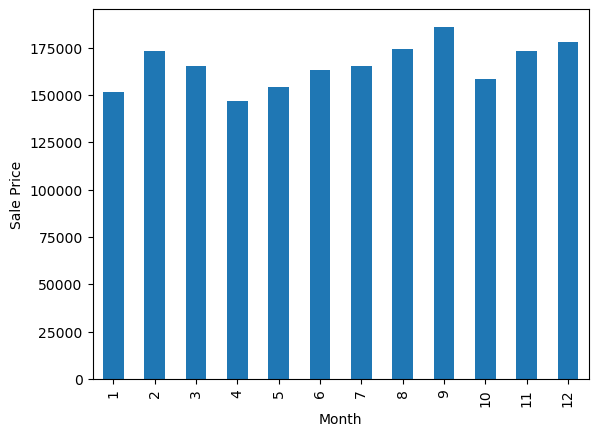

In [996]:
#check for the monthly sale price pattern
df.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

Month-sold column has been considered as numeric type.In data we dont see monthly price pattern.So we can drop it.

In [997]:
df.drop('MoSold',axis=1,inplace=True)

YearBuilt, YrSold & YearRemodAdd

Here,
- YearBuilt - the year of construction of the property
- YrSold indicates - the year of selling of that particular property.
- YearRemodAdd - remodel date or same as construction date if no remodeling or additions

Let’s do some sanity checks. So, YearBuilt should be less than YrSold, YearBuilt should be less than YearRemodAdd & YearRemodAdd should be less than YrSold for obvious reasons. Let’s check for any data anomaly.

In [998]:
(df.YearBuilt>df.YrSold).sum()

0

In [999]:
(df.YearRemodAdd<df.YearBuilt).sum()

0

In [1000]:
(df.YearRemodAdd>df.YrSold).sum()

1

Here for one data point, we have YearRemodAdd more than YrSold,This is a data anomaly. So let’s drop this column.

In [1001]:
#check the anamalous row
print(df[df.YearRemodAdd>df.YrSold].YearRemodAdd)
print(df[df.YearRemodAdd>df.YrSold].YrSold)

523    2008
Name: YearRemodAdd, dtype: int64
523    2007
Name: YrSold, dtype: int64


In [1002]:
#drop the anamalous row
df=df[df.YearRemodAdd<=df.YrSold]

Now it seems logical to set the rule that the older the property gets, the more depreciated selling price it earns. So lets get the difference between YrSold and YearBuilt and set its name as house_age1.

In [1003]:
df['house_age1']=df.YrSold-df.YearBuilt
df.house_age1.describe()

count    1457.000000
mean       36.616335
std        30.243455
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: house_age1, dtype: float64

Check relation of house_age1 with SalePrice via a scatter plot

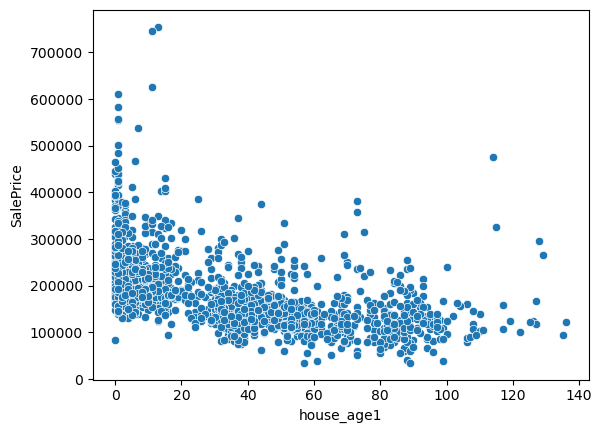

In [1004]:
sns.scatterplot(x=df.house_age1,y=df.SalePrice)
plt.show()

Mostly clients give priority to the year of remodeling compared to year of original construction. Lets use YearRemodAdd and YrSold columns to get the age of the property and get its relation with SalePrice.

In [1005]:
df['house_age2']=df.YrSold-df.YearRemodAdd

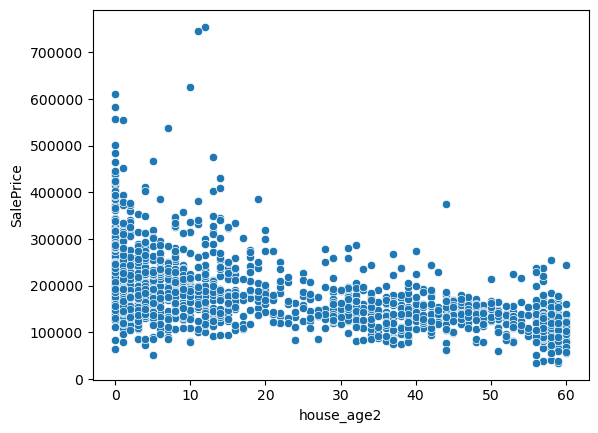

In [1006]:
sns.scatterplot(x=df.house_age2,y=df.SalePrice)
plt.show()

Here we notice that house_age2 has stronger negative relation with SalePrice as compared to house_age1 column. So lets use house_age2 for our model building. So, we can now drop YearBuilt, YearRemodAdd, YrSold & house_age1 columns.

In [1007]:
df.drop(['YearBuilt', 'YearRemodAdd','house_age1','YrSold'], axis=1,inplace=True)

#### Check for predictors with very high percentage of any single value

In [1008]:
#check for columns with more that 85% same values
cols=df.select_dtypes(['int64','float64','object']).columns
skewed_cols={}
for col in cols:
    if max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,Street,1.00
1,LandContour,0.90
2,Utilities,1.00
3,LandSlope,0.95
4,Condition1,0.86
5,Condition2,0.99
6,RoofMatl,0.98
7,ExterCond,0.88
8,BsmtCond,0.90
9,BsmtFinType2,0.86


We can drop these predictors since it would not add any value in our model, being highly skewed.

In [1009]:
df.drop(list(skewed_cols.keys()),axis=1,inplace=True)

### Outlier treatment

Form dataframe containing predictors and the corresponding outlier percetange.

In [1010]:
numeric_cols=df.select_dtypes(['int64','float64']).columns
outliers_per_dict={}
for i in numeric_cols:
    IQR=df[i].quantile(.75)-df[i].quantile(.25)
    outliers_count=df[(df[i]>(df[i].quantile(.75)+1.5*IQR)) | (df[i]<(df[i].quantile(.25)-1.5*IQR))].shape[0]
    total=df.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per
outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,Id,0.00
1,MSSubClass,7.07
2,LotFrontage,7.21
3,LotArea,4.60
4,OverallQual,0.14
5,OverallCond,8.58
6,MasVnrArea,6.66
7,BsmtFinSF1,0.41
8,BsmtUnfSF,1.99
9,TotalBsmtSF,4.05


Let’s try removing outliers and check what percentage of original data we are left with.

In [1011]:
df2=df
for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]
df2.shape[0]/df.shape[0]*100

58.40768702814001

So after removing outliers based in IQR, we are left with only 58.64% of the original data. Besides removing those outliers does not seem a wise option as the same results in significant reduction in our available data for model building.

The outliers in our response variable and check whether outlier removal help in making the same more normal.

Text(0.5, 1.0, 'Without any transformation')

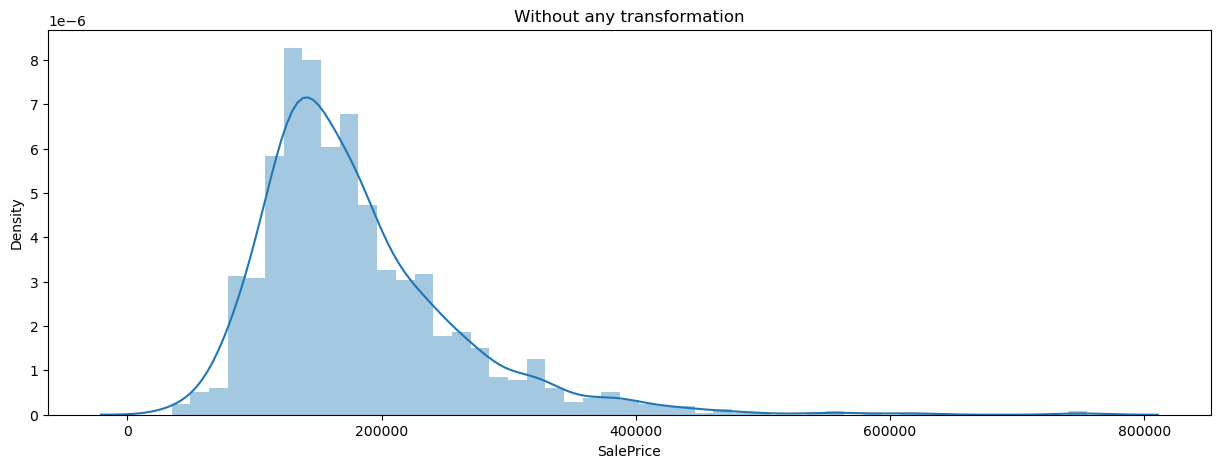

In [1012]:
#plotting distribution of 'SalePrice'
plt.figure(figsize=(15,5))
sns.distplot(df['SalePrice'])
plt.title('Without any transformation')

Tranforming the skewed dependent variable by taking log and checked whether it will be normally distributed or not.

Text(0.5, 1.0, 'With log transformation')

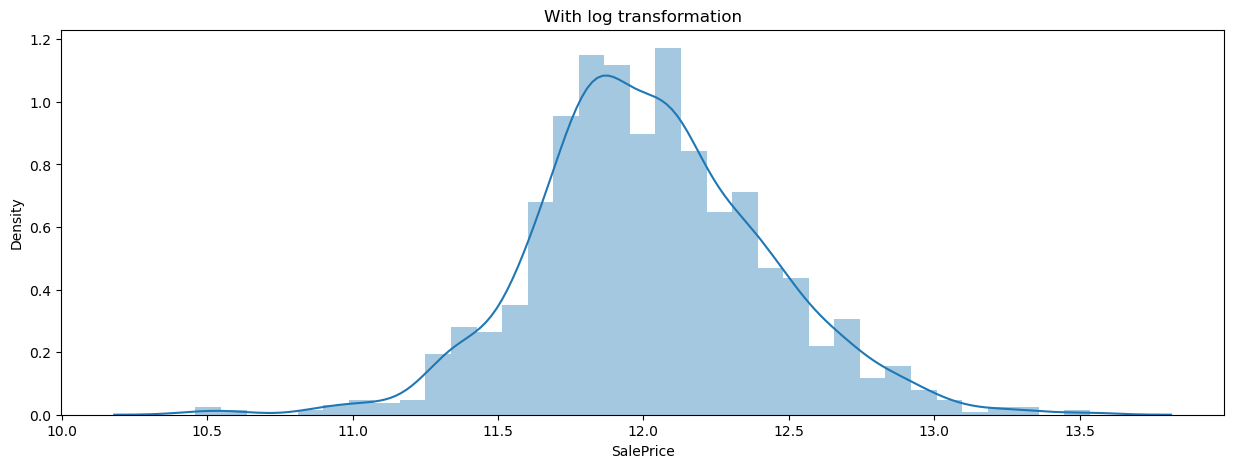

In [1013]:
#plotting distribution of 'log(SalePrice)' 
plt.figure(figsize=(15,5))
sns.distplot(np.log(df['SalePrice']))
plt.title('With log transformation')

From above, we note that by applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it seem prudent to use this transformation on SalePrice column for pure model building.

In [1014]:
df['SalePrice']=np.log(df['SalePrice'])

### Data Visualization

Let’s check the correlation among variables and remove those independent variables with large correlation.

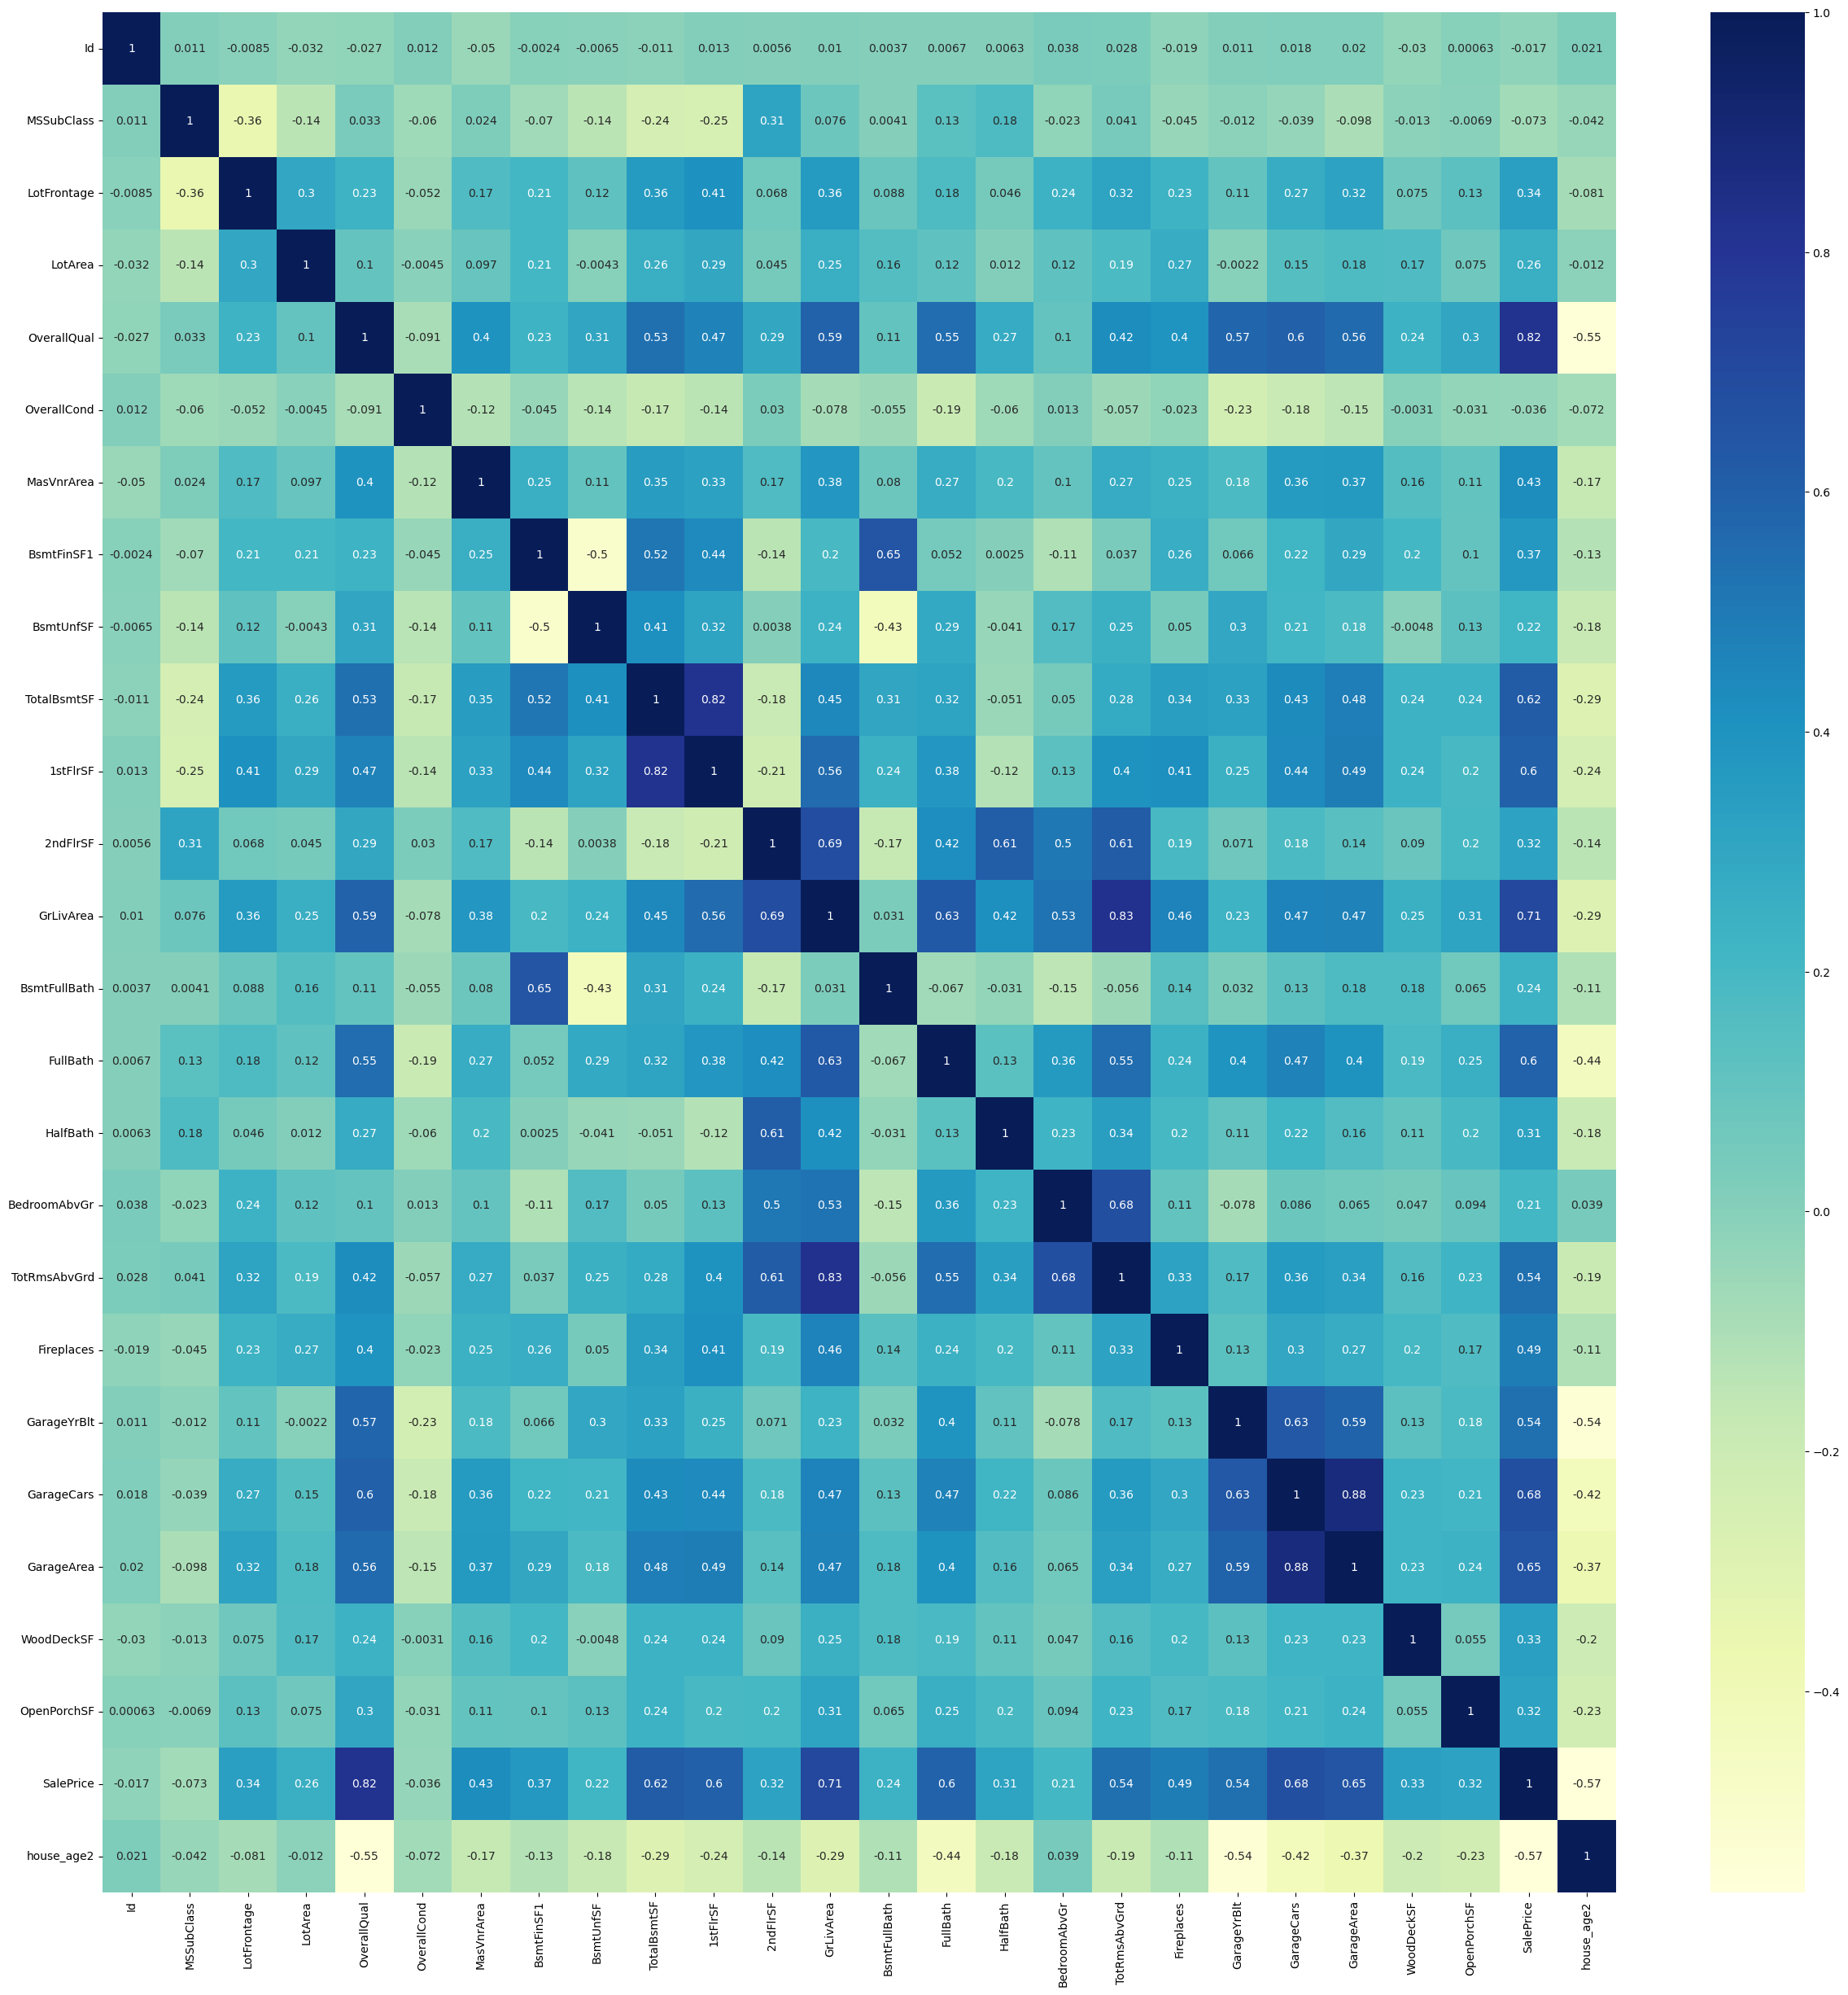

In [1015]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

Here, we find following highly correlated independent variables:

- TotalBsmtSF & 1stFlrSF have 82% correlation
- TotRmsAbvGrd & GrLivArea have 83% correlation
- GarageCars & GarageArea have 88% correlation

So we have to make decision here to remove any one of the two highly correlated variables. Let’s drop 1stFlrSF, TotRmsAbvGrd and GarageArea.

In [1016]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

Now let’s plot scatter plot for all numeric data with target variable SalePrice

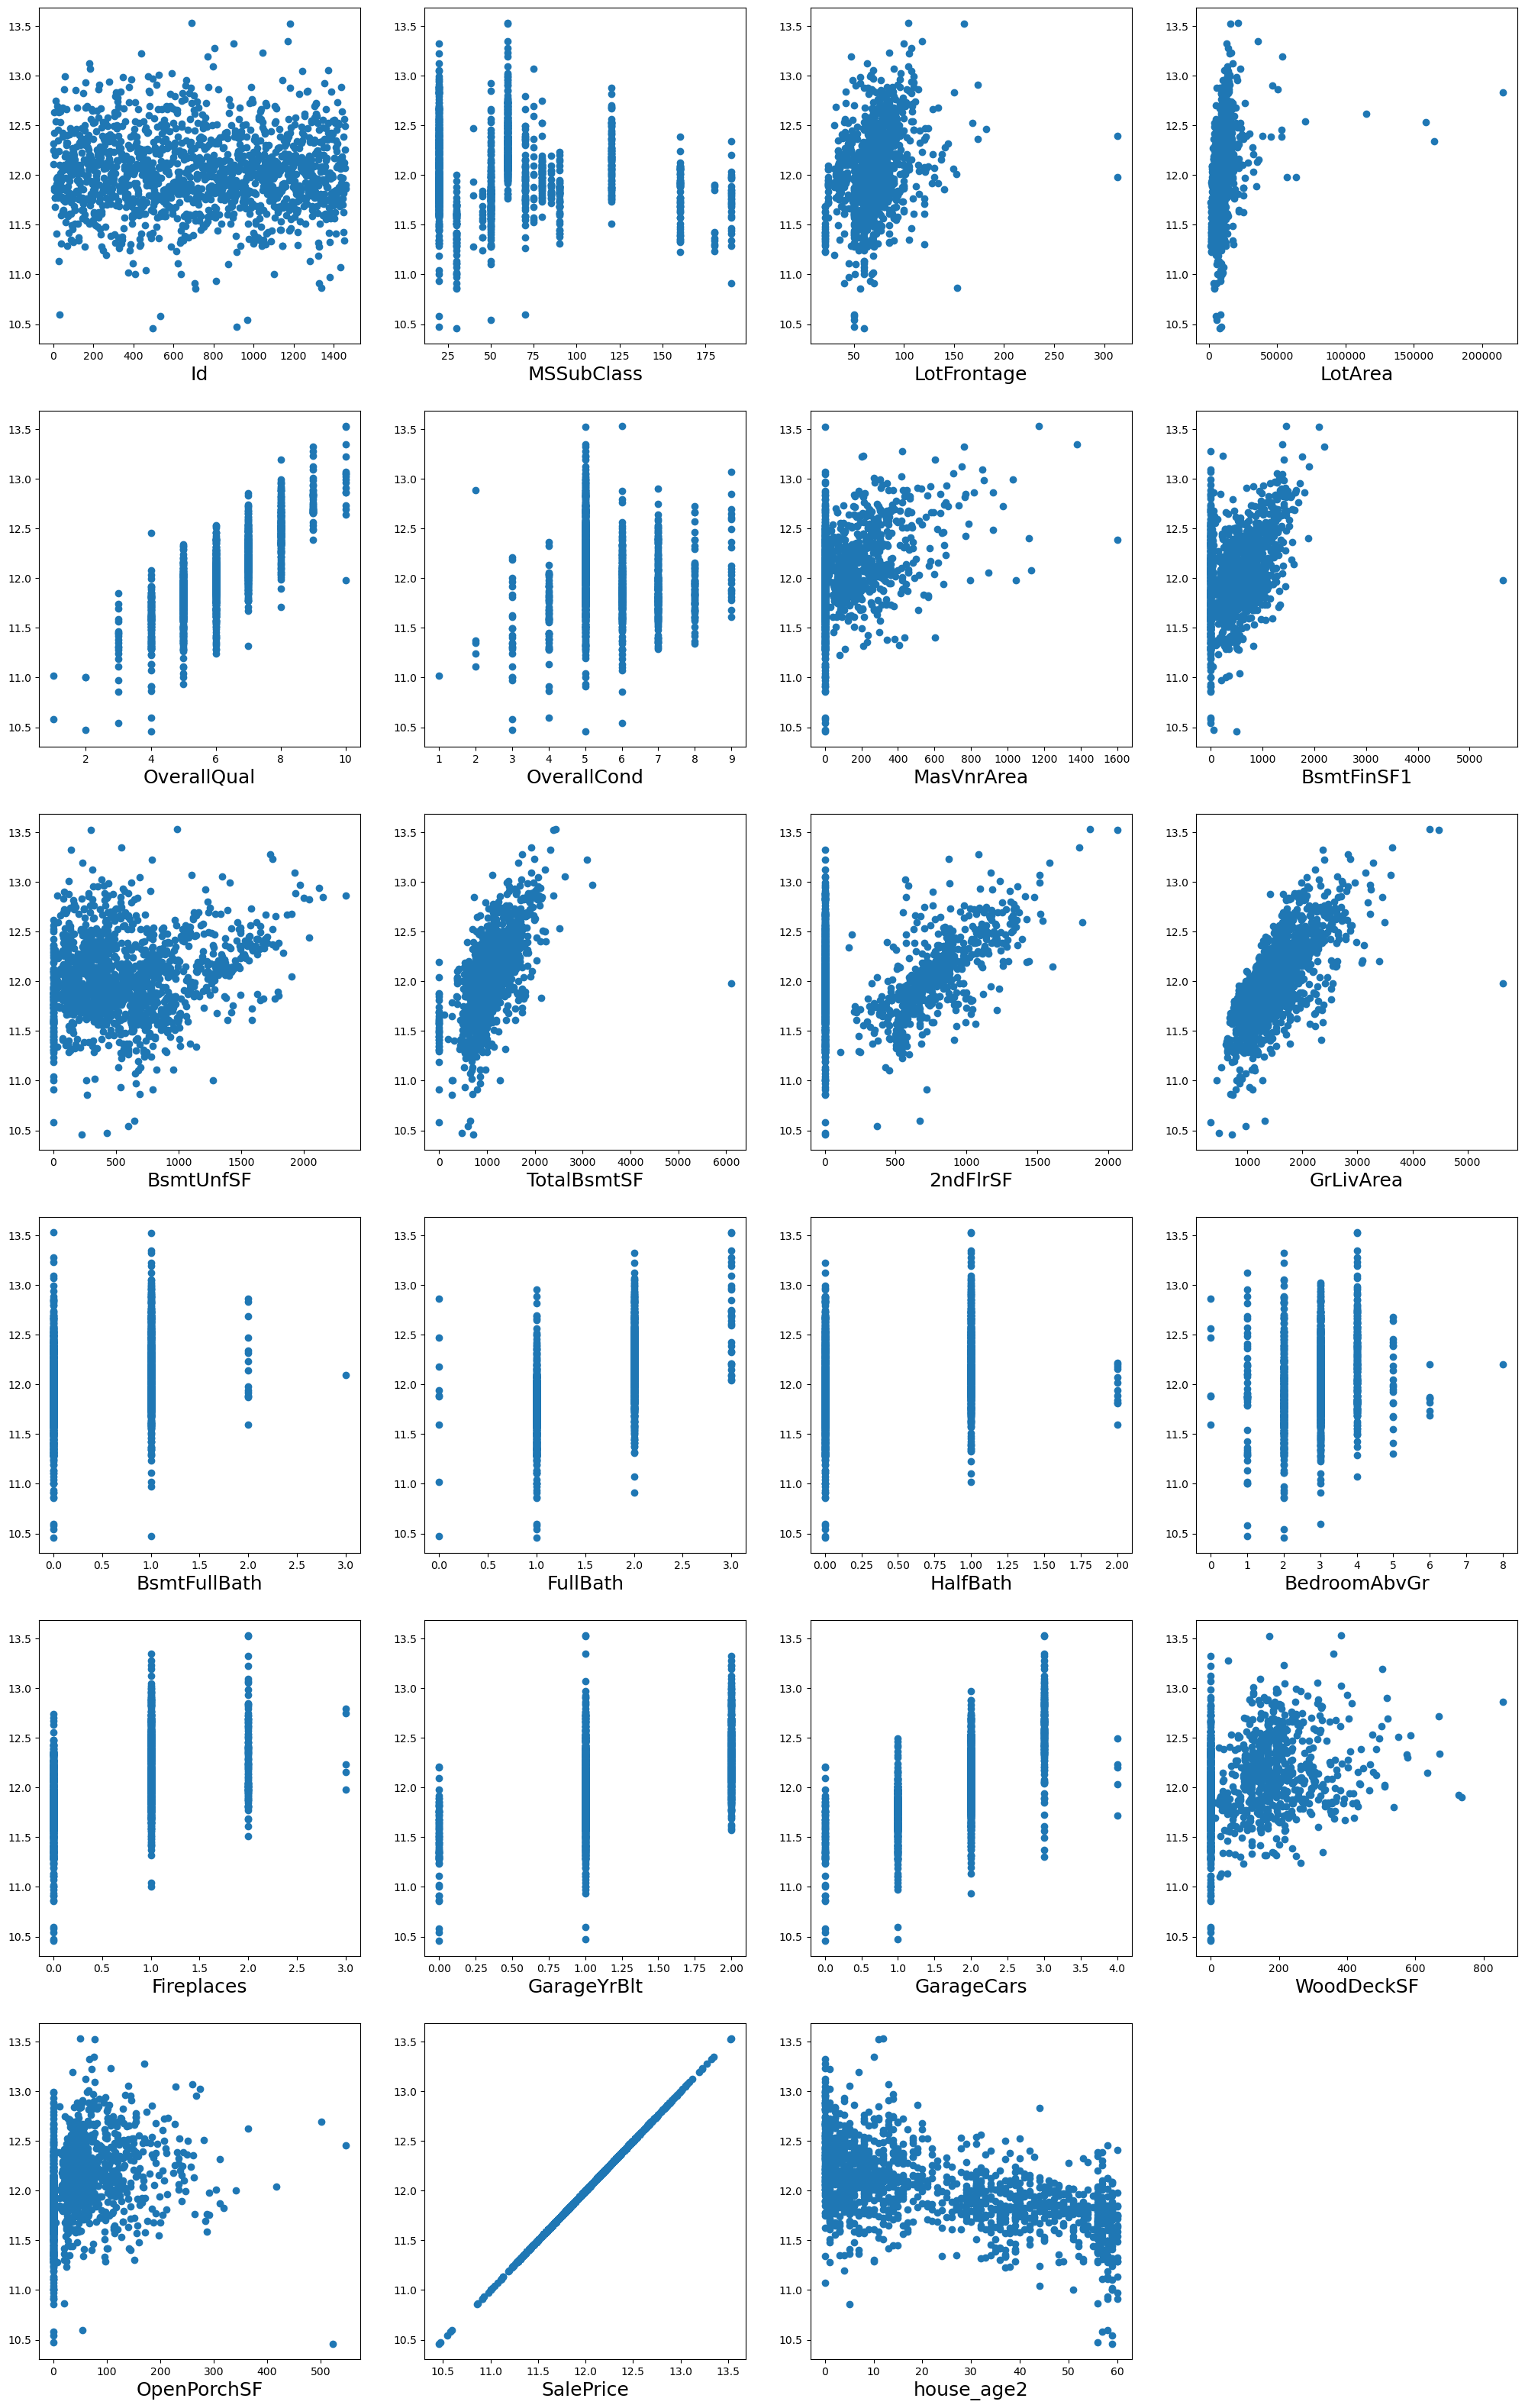

In [1017]:
num_col=list(df.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(df[n],df['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

We notice that many variables seems to have good positive anf negative correlation with the target variable.

Let’s checkout the distribution of target variable based on different categories of categorical columns.

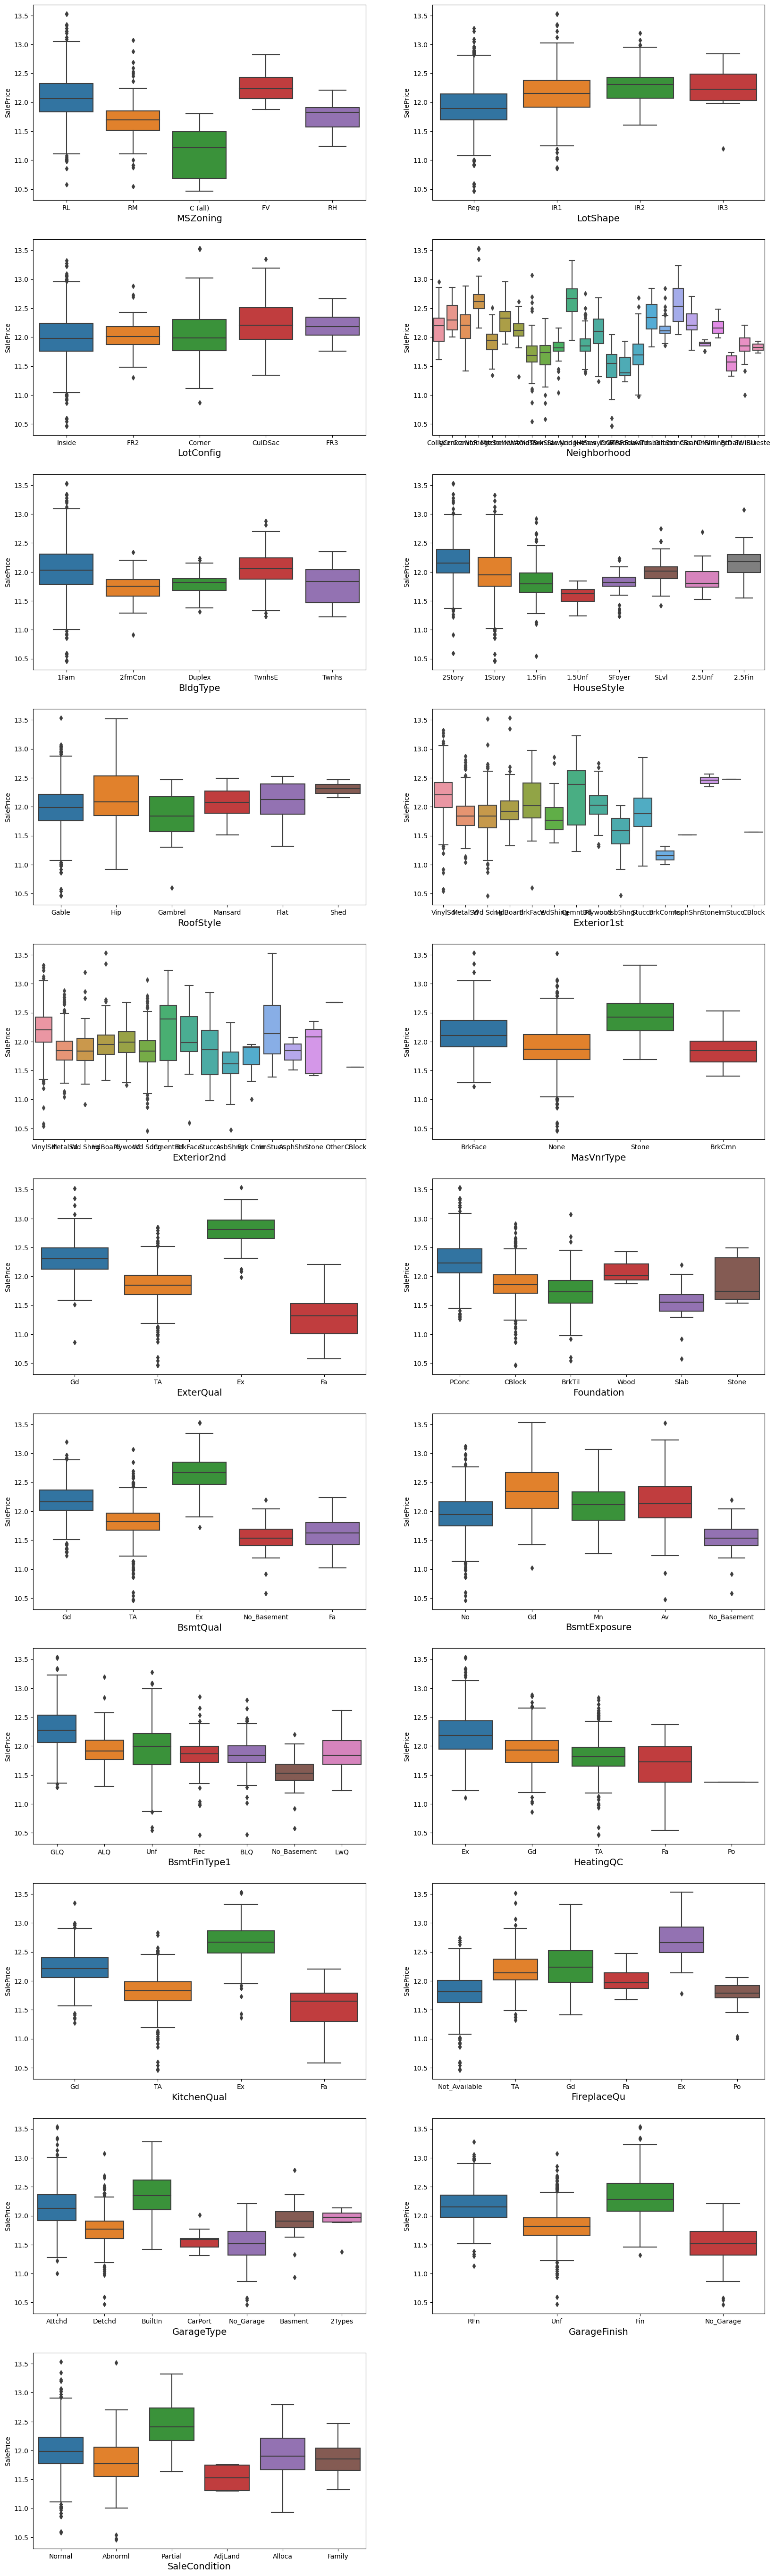

In [1018]:
cat_col=list(df.select_dtypes('object'))
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df)
    plt.xlabel(n, fontsize=14)
plt.show()

## Data Preparation

Three kinds of predictor variables viz. 
ordered categorical, 
unordered categorical and 
numeric. 

It’s better to convert ordered categorical variable into numeric type rather than converting them into dummies as the same may add value to our model.

In [1019]:
#check for 'object' type columns
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [1020]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
SaleCondition    0
SalePrice        0
house_age2       0
dtype: int64

In [1021]:
df.LotShape.value_counts()

Reg    925
IR1    481
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1022]:
#giving different weightage by mapping based on the data dictionaty
df['LotShape']=df['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

In [1023]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
SaleCondition    0
SalePrice        0
house_age2       0
dtype: int64

In [1024]:
df.ExterQual.value_counts()

TA    906
Gd    486
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [1025]:
#giving different weightage by mapping based on the data dictionaty
df['ExterQual']=df['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [1026]:
df.BsmtQual.value_counts()

TA             649
Gd             616
Ex             120
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [1027]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtQual']=df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No_Basement':0})

In [1028]:
df.BsmtExposure.value_counts()

No             952
Av             221
Gd             133
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [1029]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtExposure']=df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No_Basement':0})

In [1030]:
df.BsmtFinType1.value_counts()

Unf            429
GLQ            416
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [1031]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtFinType1']=df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No_Basement':0})

In [1032]:
df.HeatingQC.value_counts()

Ex    738
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1033]:
#giving different weightage by mapping based on the data dictionaty
df['HeatingQC']=df['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [1034]:
df.KitchenQual.value_counts()

TA    735
Gd    584
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [1035]:
#giving different weightage by mapping based on the data dictionaty
df['KitchenQual']=df['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

In [1036]:
df.FireplaceQu.value_counts()

Not_Available    690
Gd               378
TA               312
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [1037]:
#giving different weightage by mapping based on the data dictionaty
df['FireplaceQu']=df['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not_Available':0})

In [1038]:
df.GarageFinish.value_counts()

Unf          605
RFn          420
Fin          351
No_Garage     81
Name: GarageFinish, dtype: int64

In [1039]:
#giving different weightage by mapping based on the data dictionaty
df['GarageFinish']=df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No_Garage':0})

In [1040]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
SaleCondition    0
SalePrice        0
house_age2       0
dtype: int64

LotConfig, MasVnrType, SaleCondition, etc. are unordered categoricl variables. Customer’s taste may vary and accordingly the price of property.

So lets create dummies for rest of the unordered categorical variables.

In [1041]:
#get 'object' datatype
unordered_columns=df.select_dtypes('object').columns

In [1042]:
#get dummies of object dtype columns and joining the same with main df
for i in unordered_columns:
    dum_df=pd.get_dummies(df[i],prefix=i,drop_first=True)   #enabling drop_first
    df=pd.concat([df,dum_df],axis=1)
    df.drop(i,axis=1,inplace=True)   #dropping used object dtype column

Let’s drop Id column as the same seem of no use for model building

In [1043]:
df.drop('Id',axis=1,inplace=True)

In [1044]:
#check info of finally prepared dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 127 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(96)
memory usage: 500.8 KB


## Train Test Split

In [1045]:
df.shape

(1457, 127)

#### Splitting into train and test sets

In [1046]:
df_train, df_test= train_test_split(df,train_size=0.7,random_state=42)

#### Scalling the predictor

Let’s use min-max scalling to fit the predictors on df_train only.

In [1047]:
scaler=MinMaxScaler()
df_train_transformed=scaler.fit_transform(df_train)
#convert the scalled data array into dataframe
df_train_transformed=pd.DataFrame(df_train_transformed, columns=df_train.columns)
df_test_transformed=scaler.transform(df_test)
#convert the scalled data array into dataframe
df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

#### Dividing into X & y

In [1048]:
y_train=df_train_transformed['SalePrice']
X_train=df_train_transformed.drop('SalePrice',axis=1)
y_test=df_test_transformed['SalePrice']
X_test=df_test_transformed.drop('SalePrice',axis=1)

## Model Building and Evaluation

#### Ridge Regression

Let’s first use Grid Search Cross Validation method to get the best value of hyperparameter alpha for ridge regression model.

In [1050]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds=5

ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

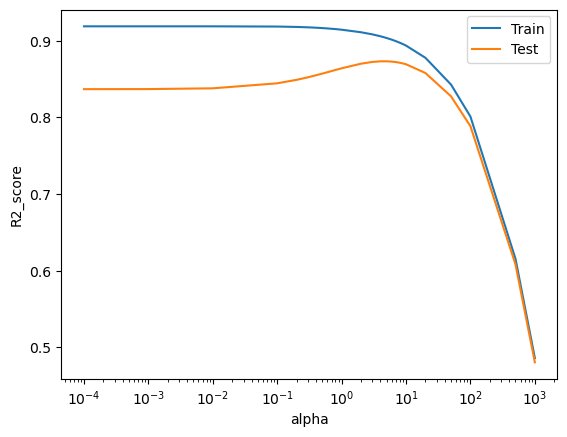

In [1051]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)
#plotting R2 score vs alpha value
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


Let’s check the model’s performance on two different values of alpha i.e. 10 & 100.

In [1052]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.89
test R2 score is 0.87


In [1053]:
alpha=100
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.81
test R2 score is 0.8


In [1054]:
alpha=9
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.9
test R2 score is 0.87


R2 score for train and test data with Ridge regularisation (alpha=10) are signifying the model is good with good bias-variance trade off.

Let’s check out the coefficient values with alpha value as 10.

In [1055]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-2.35669602e-02  9.56951161e-03  2.46204895e-02 -8.06115056e-03
  9.82508300e-02  5.06338941e-02  1.96597646e-02  2.52804921e-02
  3.80097055e-02  3.21563456e-02  2.48147265e-02  1.84858676e-02
  1.95872934e-02  3.05932095e-02  2.02522180e-02  5.46539943e-02
  8.13983194e-02  2.71877756e-02  6.28117956e-02  2.90918709e-02
  3.84554153e-02  3.09326845e-02  2.49569721e-02  2.72137101e-02
  4.32319010e-03  1.34407794e-02  7.31339044e-02  2.40088850e-02
  3.30928682e-02 -2.62323033e-02  1.10419760e-02  9.79299926e-03
  1.37482329e-02 -6.20783632e-03  1.52083468e-02 -1.68382527e-02
 -2.32925298e-03 -2.45788513e-03 -2.69826839e-03 -9.52416751e-04
 -1.03431440e-05  9.27297157e-03 -5.69438008e-03  3.40936231e-02
 -2.60842684e-02 -1.94212229e-02 -2.40532282e-02 -2.56845930e-02
 -7.95296311e-03 -4.79471812e-03  5.25592860e-03 -6.80836764e-03
  2.66467932e-02  2.81368415e-02 -1.57949288e-02 -7.11833327e-03
 -1.52502911e-02 -3.75753415e-03  1.15529652e-02  3.44256033e-02
  5.28479323e-03  1.87591

We know that unlike ridge regression, lasso regression helps in feature reduction. So, let’s now see how lasso regression can help in elimination of excess features.

#### Lasso Regression

First let’s use GridSearchCV method to get the best value of hyperparameter for lasso regression.

In [1056]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

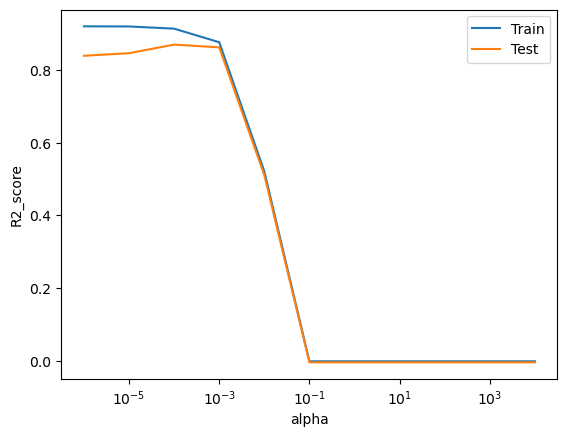

In [1057]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [1058]:
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.89


In [1059]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.87
test R2 score is 0.86


In [1060]:
alph= 0.00001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.89


From above, alpha value of 0.001 seems a better candidate.

In [1061]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.02289184  0.          0.         -0.          0.19977987  0.03340759
  0.          0.00902286  0.02888831  0.02872865  0.02589027  0.
  0.          0.          0.00974127  0.          0.27706851  0.01688193
  0.03483216  0.01201642  0.          0.02517837  0.00082499  0.03890453
  0.          0.01184969  0.10046078  0.          0.         -0.0251065
  0.         -0.          0.00050078 -0.03155752  0.00702835 -0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.          0.00770222 -0.00957026 -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.          0.00633472
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
 -0.         -0.01109722 -0.          0.         -0.          0.
 -0.         -0.          0.00979278 -0.          0.         -0.
  0.          0.          0.          0.         -0

In [1062]:
#dictionary containing all the variables and coefficients after lasso regression
lasso_dict=dict(zip(X_train.columns,lasso.coef_))
#only non-zero coefficients
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

{'MSSubClass': -0.023,
 'OverallQual': 0.2,
 'OverallCond': 0.033,
 'ExterQual': 0.009,
 'BsmtQual': 0.029,
 'BsmtExposure': 0.029,
 'BsmtFinType1': 0.026,
 'HeatingQC': 0.01,
 'GrLivArea': 0.277,
 'BsmtFullBath': 0.017,
 'FullBath': 0.035,
 'HalfBath': 0.012,
 'KitchenQual': 0.025,
 'Fireplaces': 0.001,
 'FireplaceQu': 0.039,
 'GarageFinish': 0.012,
 'GarageCars': 0.1,
 'house_age2': -0.025,
 'MSZoning_RL': 0.001,
 'MSZoning_RM': -0.032,
 'LotConfig_CulDSac': 0.007,
 'Neighborhood_Crawfor': 0.008,
 'Neighborhood_Edwards': -0.01,
 'Neighborhood_NridgHt': 0.006,
 'RoofStyle_Gable': -0.011,
 'Exterior1st_BrkFace': 0.01,
 'MasVnrType_None': -0.003,
 'Foundation_PConc': 0.015,
 'GarageType_Attchd': 0.009,
 'SaleCondition_Partial': 0.006}

In [1063]:
#sorting the coefficient dictionary
import operator
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))
#printing the final model equation
a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = 0.17+ [ 0.277 X GrLivArea + 0.2 X OverallQual + 0.1 X GarageCars + 0.039 X FireplaceQu + 0.035 X FullBath + 0.033 X OverallCond + 0.029 X BsmtQual + 0.029 X BsmtExposure + 0.026 X BsmtFinType1 + 0.025 X KitchenQual + 0.017 X BsmtFullBath + 0.015 X Foundation_PConc + 0.012 X HalfBath + 0.012 X GarageFinish + 0.01 X HeatingQC + 0.01 X Exterior1st_BrkFace + 0.009 X ExterQual + 0.009 X GarageType_Attchd + 0.008 X Neighborhood_Crawfor + 0.007 X LotConfig_CulDSac + 0.006 X Neighborhood_NridgHt + 0.006 X SaleCondition_Partial + 0.001 X Fireplaces + 0.001 X MSZoning_RL + -0.003 X MasVnrType_None + -0.01 X Neighborhood_Edwards + -0.011 X RoofStyle_Gable + -0.023 X MSSubClass + -0.025 X house_age2 + -0.032 X MSZoning_RM ]


## Conclusion :

The optimal alpha value in case of Ridge and Lasso is as below:

- Ridge - 10
- Lasso - 0.001

#### Question 3

3.	After building the model, you realize that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


Most important predictors are : GrLivArea,OverallQual,GarageCars,FireplaceQu and FullBath

Let's drop these columns

In [1065]:
X_train2 = X_train.drop(['GrLivArea','OverallQual','GarageCars','FireplaceQu','FullBath'],axis=1)
X_test2 = X_test.drop(['GrLivArea','OverallQual','GarageCars','FireplaceQu','FullBath'],axis=1)

In [1066]:
X_train2.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.941176,0.047945,0.011101,1.000000,0.428571,0.058055,0.333333,0.8,1.00,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.235294,0.164384,0.061890,0.666667,0.714286,0.000000,0.666667,0.8,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.065068,0.014490,1.000000,0.857143,0.000000,0.333333,0.4,0.25,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.057094,1.000000,0.571429,0.000000,0.333333,0.6,0.25,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.176471,0.321918,0.093417,1.000000,0.428571,0.000000,0.333333,0.6,0.25,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1067]:
X_test2.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.150685,0.030382,1.000000,0.714286,0.064586,0.333333,0.6,0.25,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.823529,0.047945,0.011381,1.000000,0.428571,0.158200,0.666667,0.8,0.25,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.164384,0.014504,0.333333,0.428571,0.313498,1.000000,1.0,0.75,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.178082,0.035958,0.666667,0.428571,0.000000,0.666667,0.8,0.75,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.235294,0.164384,0.037112,1.000000,0.428571,0.287373,0.666667,0.8,0.25,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1068]:
# alpha 10 
alpha =0.001
lasso21 = Lasso(alpha=alpha)
lasso21.fit(X_train2, y_train) 

Lasso(alpha=0.001)

In [1069]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso21.predict(X_train2)
y_pred_test = lasso21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8173843910595617
0.7988223817280429
3.2273263570360458
1.4167845622066053
0.003167150497581988
0.003234667950243391


In [1071]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso21'] = lasso21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso21
MSSubClass,-0.026814
LotFrontage,0.000000
LotArea,0.000000
LotShape,-0.000000
OverallCond,0.018244
MasVnrArea,0.000000
ExterQual,0.061314
BsmtQual,0.044178
BsmtExposure,0.041880
BsmtFinType1,0.019287


In [ ]:
TotalBsmtSF,ExterQual,OverallCond,2ndFlrSF,BsmtQual